In [1]:
import pandas as pd
import numpy as np
from csv import DictWriter
import math
from sklearn import linear_model

df = pd.read_csv("estateagent.csv")
df.head()
# price = m1 * area + m2 * bedrooms + m3 * age +b
# independent variable ; area, bedrooms and age  dependent variable ; price

,area,bedrooms,age,price
0,2600,3.0,25,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [2]:
df.bedrooms.median()

3.5

KeyError: 'a'

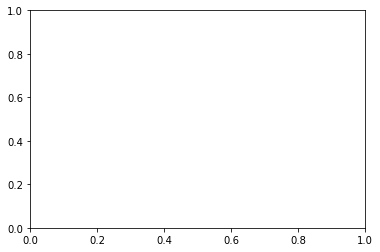

In [3]:
med_bedrooms = math.floor(df.bedrooms.median())
med_bedrooms
df.bedrooms.fillna(med_bedrooms, inplace = True)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["area", "bedrooms", "age"]], df.price)

In [ ]:
# price = m1 * area + m2 * bedrooms + m3 * age +b
coef = reg.coef_
m1 = coef[0]
m2 =  coef[1]
m3 = coef[2]

In [ ]:
intercept = reg.intercept_

In [ ]:
area = int(input("Input area of house > "))
bedrooms = int(input("how many bedrooms it has > "))
age = int(input("how old it is "))

In [ ]:
price = round(reg.predict([[area, bedrooms, age]])[0])
print(f"price of the house = ${price:,d}")

calculate_price = round(m1 * area + m2 * bedrooms + m3 * age + intercept)
print(f"m1 * area + m2 * bedrooms + m3 * age + intercept = ${calculate_price:,d}")

In [ ]:
field_names = ['area','bedrooms','age',
               'price']
dframe = {"area": area, "bedrooms": bedrooms, "age":age, "price":price}
dframe
with open('estateagent.csv', 'a') as f_object:
    dictwriter_object = DictWriter(f_object, fieldnames=field_names)
    dictwriter_object.writerow(dframe)
f_object.close()
df = pd.read_csv('estateagent.csv')
df